# Linear Algebra and the Geometry of Least Squares
This notebook accompanies [this blog post](https://adamheins.com/blog/linear-algebra-geometry).

In [36]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## No Solutions

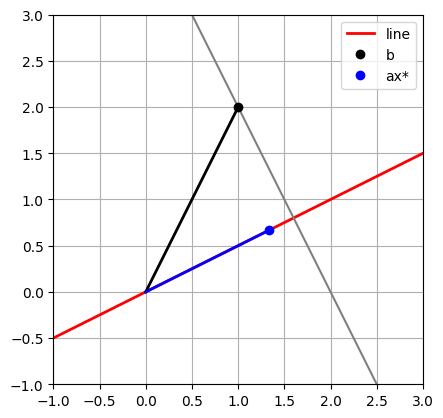

In [37]:
# define the direction of the line
a = np.array([2, 1])

# vector to project onto the line
b = np.array([1, 2])

# add some damping if desired
α = 1
assert α >= 0

# solve for closest point on the line
x = a @ b / (a @ a)
x_damped = a @ b / (a @ a + α)
y_damped = a * x_damped
y = a * x  # closest point

# this plot captures Figures 1, 2, and 3

# line
plt.axline(np.zeros(2), a, color="r", lw=2, label="line")

# line passing through b and (undamped) closest point
plt.axline(b, y, color="grey")

# b
plt.plot([0, b[0]], [0, b[1]], color="k", lw=2)
plt.plot([b[0]], [b[1]], "o", color="k", label="b")

# closest point y = ax* with damping
plt.plot([0, y_damped[0]], [0, y_damped[1]], color="b", lw=2)
plt.plot([y_damped[0]], [y_damped[1]], "o", color="b", label="ax*")

ax = plt.gca()
ax.set_aspect("equal")
plt.grid()
plt.xlim([-1, 3])
plt.ylim([-1, 3])
plt.legend()
plt.show()

### Projection Matrices

In [30]:
# let's play a bit with general projection matrices

# define random matrix
m = 3
n = 2
A = np.random.random((m, n))

# vector to project onto column space of A
b = np.random.random(m)

# construct projection matrix
A_proj = A @ np.linalg.solve(A.T @ A, A.T)

# after first application of A_proj, further applications do not change b
assert np.allclose(A_proj @ b, A_proj @ A_proj @ b)
assert np.allclose(A_proj, A_proj @ A_proj)

# with damping, it is no longer a projection matrix because the norm of the
# vector shrinks with each application
α = 0.1
assert α >= 0
A_proj_damped = A @ np.linalg.solve(A.T @ A + α * np.eye(n), A.T)

y1 = A_proj_damped @ b
y2 = A_proj_damped @ y1
assert np.linalg.norm(y2) < np.linalg.norm(y1)

## Infinite Solutions

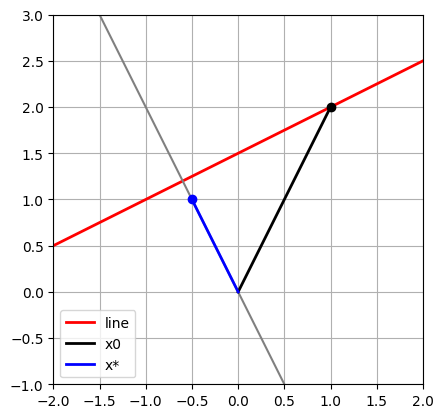

In [38]:
# now instead define a line using the constraint a @ x == b
a = np.array([1, -2])
x0 = np.array([1, 2])  # offset from the origin
b = a @ x0

slope = np.array([-a[1], a[0]])

# add some damping if desired
α = 1
assert α >= 0

# optimal value of λ; if it is changed then x will not lie on the line
λ = α * b / (a @ a + α)
x = a * λ

# this plot captures Figures 4, 5, and 7
plt.axline(x0, x0 + slope, color="r", lw=2, label="line")
plt.axline([0, 0], a, color="grey")

plt.plot([0, x0[0]], [0, x0[1]], color="k", lw=2, label="x0")
plt.plot([x0[0]], [x0[1]], "o", color="k")

plt.plot([0, x[0]], [0, x[1]], color="b", lw=2, label="x*")
plt.plot([x[0]], [x[1]], "o", color="b")

ax = plt.gca()
ax.set_aspect("equal")
plt.grid()
plt.xlim([-2, 2])
plt.ylim([-1, 3])
plt.legend()
plt.show()

### Nullspace Projection

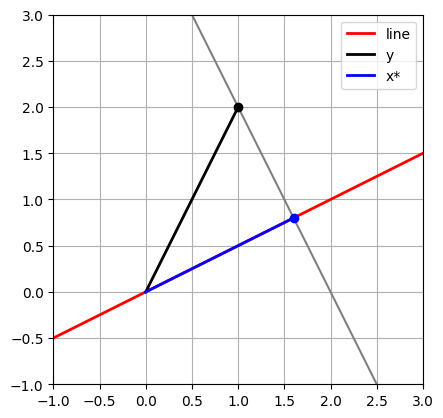

In [39]:
# we'll simplify a bit and take b = 0
# the line represents the nullspace of a
a = np.array([1, -2])
slope = np.array([-a[1], a[0]])

# vector to project onto the nullspace of a
y = np.array([1, 2])

# nullspace projector
P = np.eye(2) - np.outer(a, a) / (a @ a)

# check that P is actually a projection matrix
assert np.allclose(P, P @ P)

# closest point on the line (nullspace of a)
x = P @ y

# this plot captures Figure 6
plt.axline([0, 0], slope, color="r", lw=2, label="line")
plt.axline(y, y + a, color="grey")

plt.plot([0, y[0]], [0, y[1]], color="k", lw=2, label="y")
plt.plot([y[0]], [y[1]], "o", color="k")

plt.plot([0, x[0]], [0, x[1]], color="b", lw=2, label="x*")
plt.plot([x[0]], [x[1]], "o", color="b")

ax = plt.gca()
ax.set_aspect("equal")
plt.grid()
plt.xlim([-1, 3])
plt.ylim([-1, 3])
plt.legend()
plt.show()
